## Underwriting in the credit industry 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Importing data

In [2]:
credit=pd.read_csv('E:/dsp/Capstone project/XYZCorp_LendingData.csv')

C:\Users\Aditya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Checking shape of the data

In [3]:
credit.shape

(855969, 73)

In [4]:
credit.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Performing descriptive statistics on the data

In [5]:
credit.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

#### With info function we will get description of the columns like float, integer and object

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

#### Data Cleaning

In [7]:
credit.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

We found out that there is lots of missing values in most of the columns so we will use the function to remove
the columns which have more than 80% of missing data

In [8]:
# get a list of columns that have more than 80% null values
na_values = credit.isnull().mean()
na_values[na_values>0.80]


desc                         0.857691
mths_since_last_record       0.846742
annual_inc_joint             0.999484
dti_joint                    0.999486
verification_status_joint    0.999484
open_acc_6m                  0.984476
open_il_6m                   0.984476
open_il_12m                  0.984476
open_il_24m                  0.984476
mths_since_rcnt_il           0.984890
total_bal_il                 0.984476
il_util                      0.986438
open_rv_12m                  0.984476
open_rv_24m                  0.984476
max_bal_bc                   0.984476
all_util                     0.984476
inq_fi                       0.984476
total_cu_tl                  0.984476
inq_last_12m                 0.984476
dtype: float64

In [9]:
# drop columns with more than 80% null values

credit.dropna(thresh = credit.shape[0]*0.2, how = 'all', axis = 1, inplace = True)

# drop redundant and forward-looking columns redundant like id, member_id, title, etc. forward-looking like recoveries, 
# collection_recovery_fee, etc. drop sub_grade as same information is captured in grade column
# drop next_pymnt_d since, given that our data is historical and this column is supposed to have future dates, 
#will not make sense for our model

credit.drop(columns=['id', 'member_id', 'sub_grade', 'emp_title', 'title', 'zip_code', 'next_pymnt_d',
                     'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'],
            inplace = True)


In [10]:
credit.shape

(855969, 43)

#### Treating Null values

In [11]:
#mths_since_last_delinq has 439812 null values lets check their various parameters
print (credit.mths_since_last_delinq.min(), credit.mths_since_last_delinq.max())
print(credit.mths_since_last_delinq.mean())
print(credit.mths_since_last_delinq.median())
print(credit.mths_since_last_delinq.mode())



0.0 188.0
34.14994341078007
31.0
0    9.0
dtype: float64


In [12]:
# we will replace NA values with Median value of the column, after treatement we see zero Null Values
credit.mths_since_last_delinq = credit.mths_since_last_delinq.fillna(credit.mths_since_last_delinq.median())
credit.mths_since_last_delinq.isnull().sum()



0

In [13]:
#revol_util- Lets check various parameters here
print (credit.revol_util.min(), credit.revol_util.max())
print(credit.revol_util.mean())
print(credit.revol_util.median())
print(credit.revol_util.mode())



0.0 892.3
55.019404504615196
55.9
0    0.0
dtype: float64


In [14]:
#We will replace null values here with mean of this feature. 
credit.revol_util = credit.revol_util.fillna(credit.revol_util.mean())
credit.revol_util.isnull().sum()

0

In [15]:
#  -- tot_coll_amt  -- tot_cur_bal -- total_rev_hi_lim- Lets check features of all and treat NA with Mean
#tot_coll_amt
print (credit.tot_coll_amt.min(), credit.tot_coll_amt.max())
print(credit.tot_coll_amt.mean())
print(credit.tot_coll_amt.median())
print(credit.tot_coll_amt.mode())
print('*********************')
print('*********************')

#tot_cur_bal
print (credit.tot_cur_bal.min(), credit.tot_cur_bal.max())
print(credit.tot_cur_bal.mean())
print(credit.tot_cur_bal.median())
print(credit.tot_cur_bal.mode())
print('*********************')
print('*********************')
#total_rev_hi_lim
print (credit.total_rev_hi_lim.min(), credit.total_rev_hi_lim.max())
print(credit.total_rev_hi_lim.mean())
print(credit.total_rev_hi_lim.median())
print(credit.total_rev_hi_lim.mode())

credit.tot_coll_amt = credit.tot_coll_amt.fillna(credit.tot_coll_amt.mean())
credit.tot_cur_bal = credit.tot_cur_bal.fillna(credit.tot_cur_bal.mean())
credit.total_rev_hi_lim = credit.total_rev_hi_lim.fillna(credit.total_rev_hi_lim.mean())



0.0 9152545.0
225.41288216915868
0.0
0    0.0
dtype: float64
*********************
*********************
0.0 8000078.0
139766.24752870706
81008.5
0    0.0
dtype: float64
*********************
*********************
0.0 9999999.0
32163.5745255219
23800.0
0    15000.0
dtype: float64


In [16]:
#last_credit_pull_d- replace null with previous datapoint
credit["last_credit_pull_d"].fillna( method ='ffill', inplace = True) 

In [17]:
#collections_12_mths_ex_med- Lets check various features
print (credit.collections_12_mths_ex_med.min(), credit.collections_12_mths_ex_med.max())
print(credit.collections_12_mths_ex_med.mean())
print(credit.collections_12_mths_ex_med.median())
print(credit.collections_12_mths_ex_med.mode())

0.0 20.0
0.014230418278493258
0.0
0    0.0
dtype: float64


In [18]:
#replacing NA with Median
credit.collections_12_mths_ex_med = credit.collections_12_mths_ex_med.fillna(credit.collections_12_mths_ex_med
                                                                             .median())


### Target Variable

In [19]:
credit['default_ind'].value_counts(normalize = True)

0    0.945714
1    0.054286
Name: default_ind, dtype: float64

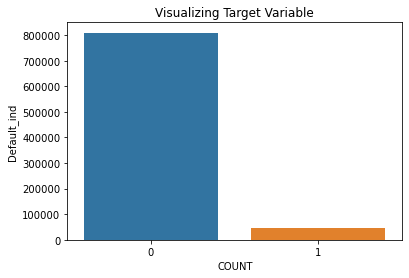

In [20]:
sns.countplot(x='default_ind',data=credit)
plt.title("Visualizing Target Variable")
plt.xlabel('COUNT')
plt.ylabel('Default_ind')
plt.show()

We observe from the target variable that data is highly imbalanced i.e. there is huge difference between 
count of 1’s & 0’s

In [21]:
credit.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq              0
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc                           0
initial_list_status                 0
out_prncp   

In [22]:
credit.drop(columns = ['mths_since_last_major_derog', 'emp_length'], inplace = True)

### Data Visualization

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount Funded by the Lender')

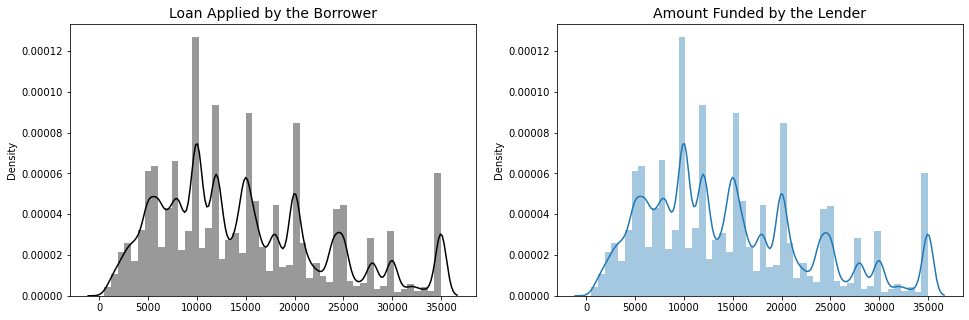

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

# Making a plot with 2 subplots

loan_amount = credit["loan_amnt"].values
funded_amount = credit["funded_amnt"].values

sns.distplot(loan_amount, ax=ax[0], color='#000000')
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1])
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
# Distribution plots


# Loan applied for and loan funded have same distribution, meaning most loans were accepted

Mean loan amount is:  14745.571334943204


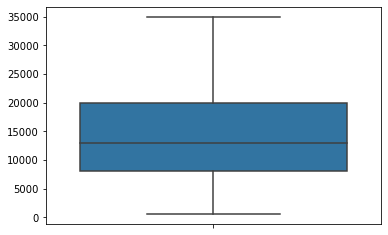

In [24]:
sns.boxplot(y=loan_amount)
print ("Mean loan amount is: ",loan_amount.mean())
# Most loans were between 10000 and 20000 dollars

In [25]:
import time 
import datetime 

In [26]:
credit['issued_date']=pd.to_datetime(credit.issue_d.str.upper(), format='%b-%y', yearfirst=False)

Number of loans issued yearwise


C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


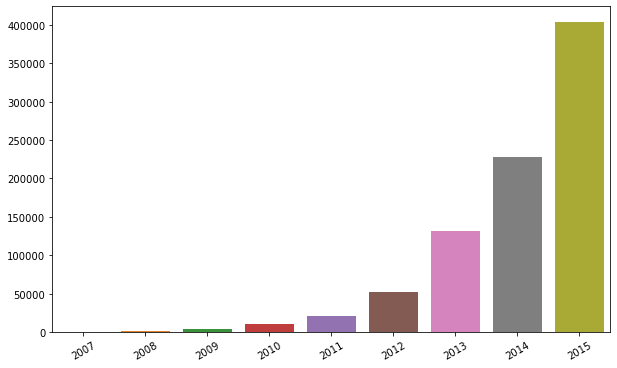

In [27]:
years = pd.to_datetime(credit.issued_date)

# Converting the issue date column to datetime format for easy parsing
credit["year"] = years.dt.year

# Taking only year from the issue date column and creating a new column
yearwise_loans = credit.year.value_counts()

# Plotting the number of loans taken yearwise

plt.figure(figsize=(10,6))
ax = sns.barplot(yearwise_loans.index, yearwise_loans.values)
# Making a seaborn barplot
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
print("Number of loans issued yearwise")
# Exponential growth in number of loans issued YoY



C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Loan Amount issued v/s Year of issue')

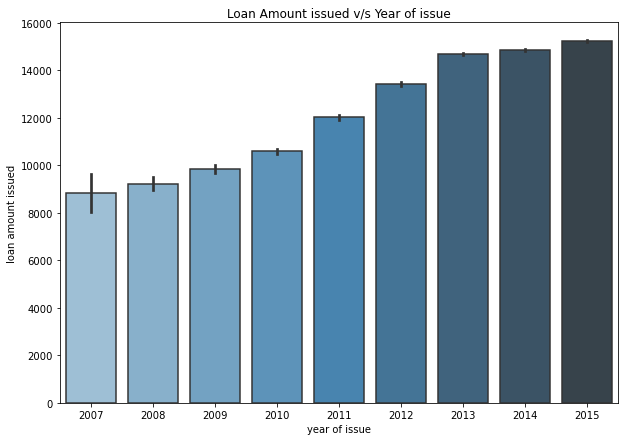

In [28]:
# Lets check how much loan amount was issue in which year

plt.figure(figsize= (10,7))
sns.barplot('year', 'loan_amnt', data=credit, palette="Blues_d",linewidth=1.5, errcolor=".2", edgecolor=".2")
plt.ylabel('loan amount issued')
plt.xlabel('year of issue')
plt.title('Loan Amount issued v/s Year of issue')

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Defaulters v/s Year')

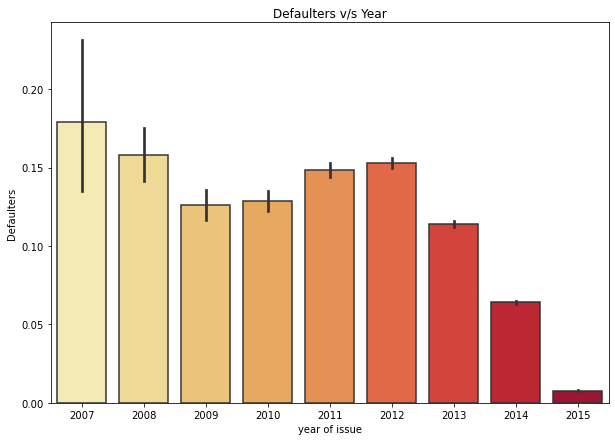

In [29]:
# NOW Let's check defaulters yearwise
# Lets check how much loan amount was issue in which year

plt.figure(figsize= (10,7))
sns.barplot('year', 'default_ind', data=credit, palette="YlOrRd",linewidth=1.5, errcolor=".2", edgecolor=".2")
plt.ylabel('Defaulters')
plt.xlabel('year of issue')
plt.title('Defaulters v/s Year')

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Loan Amt v/s grade')

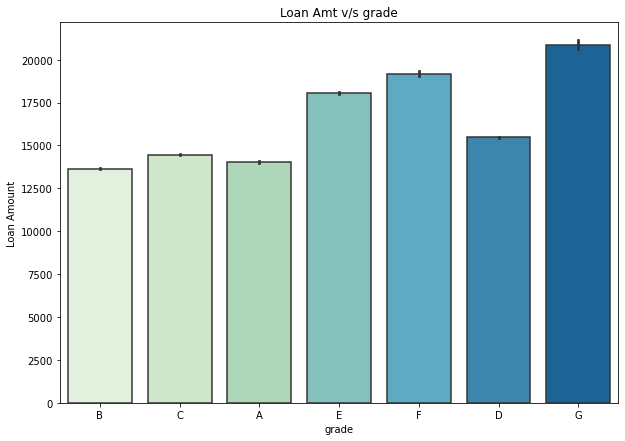

In [30]:
#grade vs loan amount
plt.figure(figsize= (10,7))
sns.barplot('grade', 'loan_amnt', data=credit, palette="GnBu",linewidth=1.5, errcolor=".2", edgecolor=".2")
plt.ylabel('Loan Amount')
plt.xlabel('grade')
plt.title('Loan Amt v/s grade')

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Loan Amt v/s home ownership')

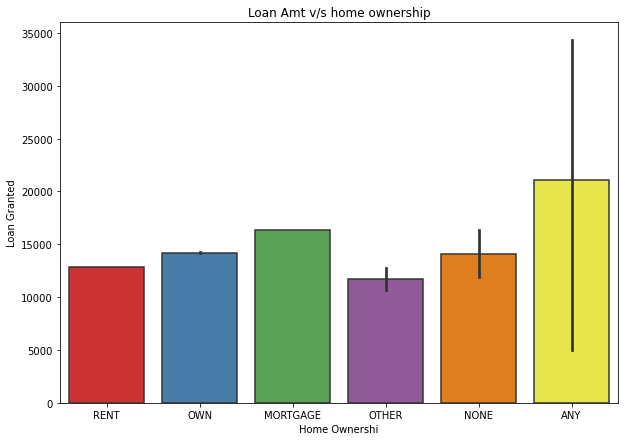

In [31]:
#'home_ownership' vs Loan granted

plt.figure(figsize= (10,7))
sns.barplot('home_ownership','loan_amnt', data=credit, palette="Set1",linewidth=1.5, errcolor=".2", edgecolor=".2")
plt.ylabel('Loan Granted')
plt.xlabel('Home Ownershi')
plt.title('Loan Amt v/s home ownership')

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Loan Amt v/s purpose')

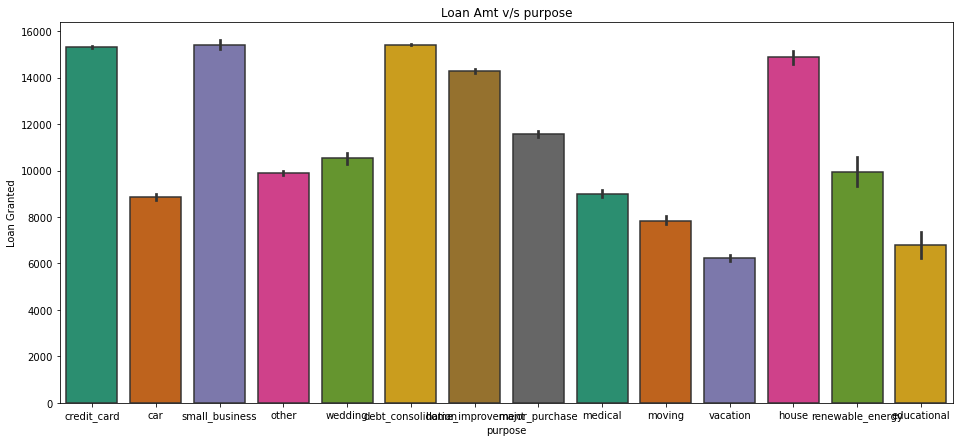

In [32]:
#purpose vs Loan

plt.figure(figsize= (16,7))
sns.barplot('purpose','loan_amnt', data=credit, palette="Dark2",linewidth=1.5, errcolor=".2", edgecolor=".2")
plt.ylabel('Loan Granted')
plt.xlabel('purpose')
plt.title('Loan Amt v/s purpose')



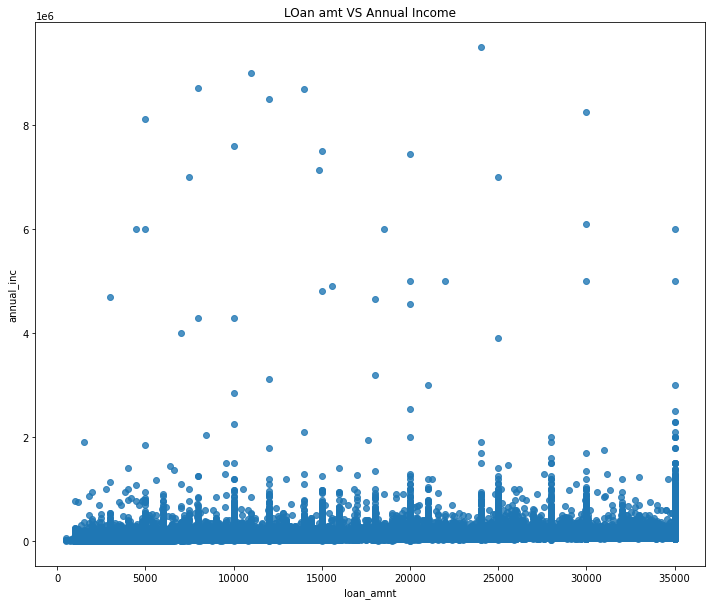

In [33]:
#  loan given wrt anuual income
plt.plot
plt.figure(figsize= (12,10))
g = sns.regplot(x=credit['loan_amnt'], y=credit['annual_inc'], fit_reg=False).set_title(
    "LOan amt VS Annual Income")
#it does not convey much

In [34]:
credit.drop(['year','issued_date'],axis=1,inplace=True)  

#### Creating Numerical and categorical columns seperately

In [35]:
credit_num = credit.select_dtypes(include = ['float64','int64'])
credit_cat = credit.select_dtypes(include = ['object'])



In [36]:
credit_num.shape

(855969, 28)

In [37]:
credit_cat.shape

(855969, 13)

#### Colinearity & Mullticolineraity

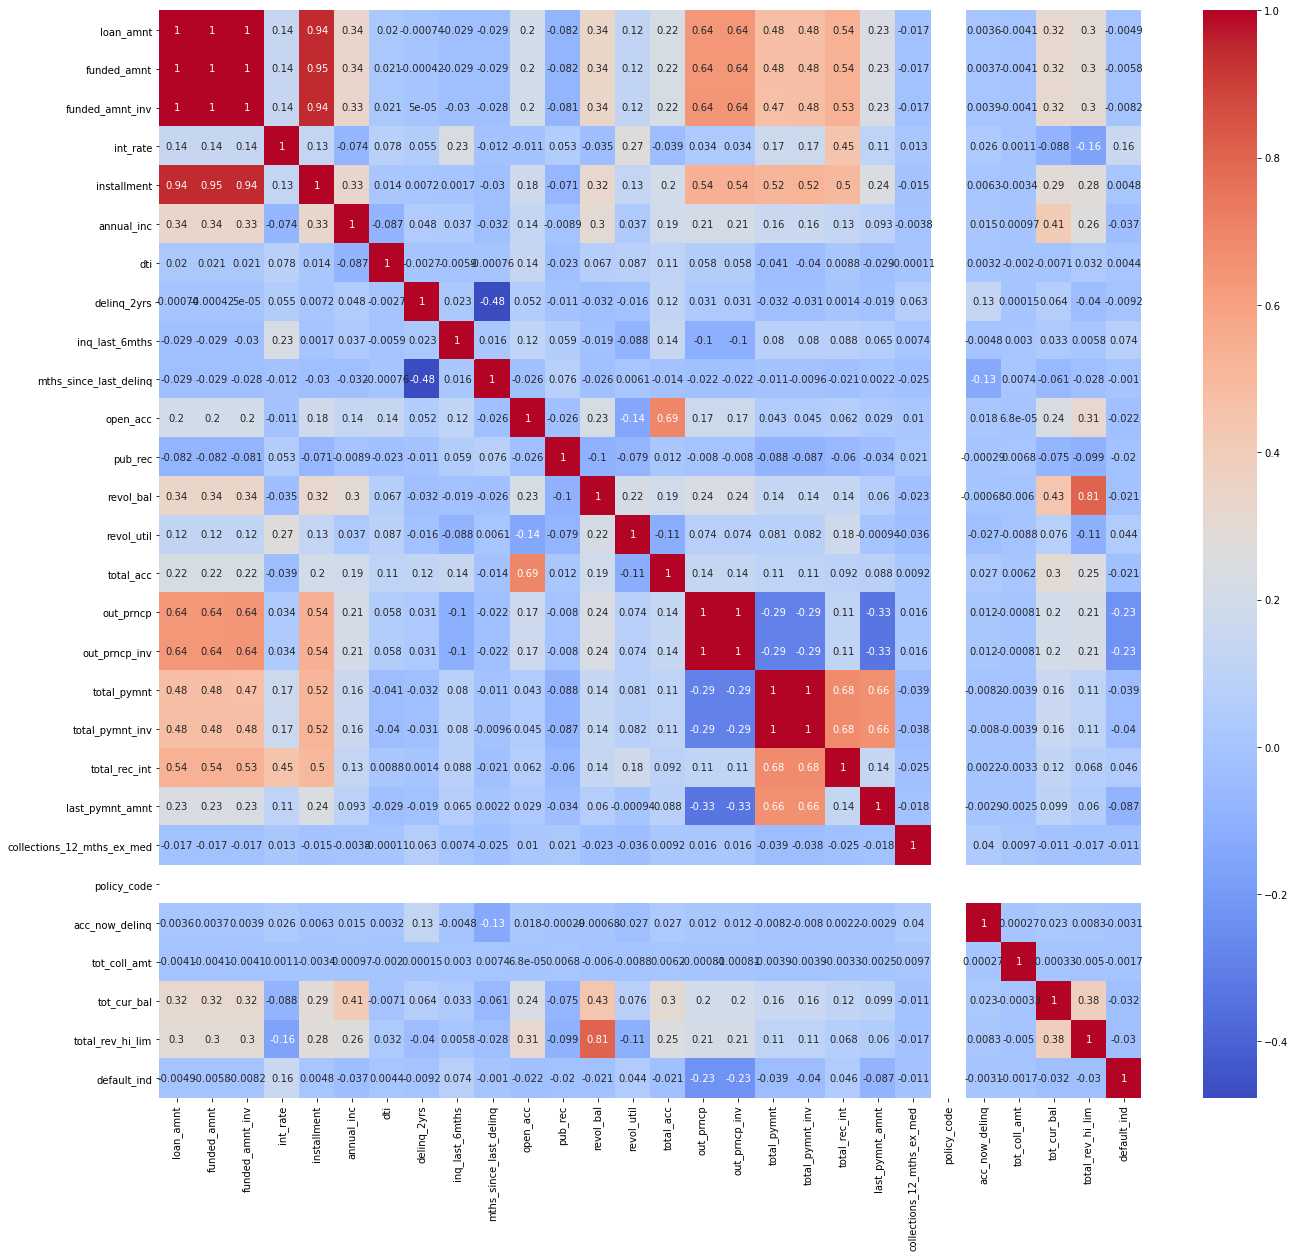

In [38]:
corrmat = credit_num.corr()

plt.figure(figsize=(22,20))
sns.heatmap(corrmat, annot=True, cmap=plt.cm.coolwarm)
plt.show()

Now we will check for muticolineraity with below code, and drop the columns whose extent of multicolinearity 
is above 80%

In [39]:
corr_matrix = credit_num.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rev_hi_lim']

In [40]:
# Drop features 
credit_num=credit_num.drop(credit_num[to_drop], axis=1)

In [41]:
credit_num.drop(['policy_code'], axis = 1, inplace = True)

In [42]:
credit_num.shape

(855969, 21)

#### Outlier treatment for all the numerical columns

In [43]:
#Treating outlier in annual_inc variable

credit_num['annual_inc']= credit_num['annual_inc'].astype(float)
credit_num['annual_inc'].describe()

count    8.559690e+05
mean     7.507119e+04
std      6.426447e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

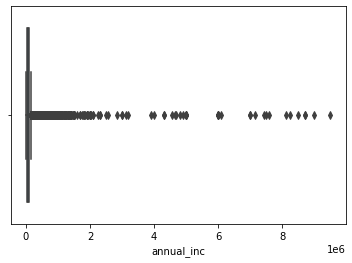

In [44]:
sns.boxplot(credit['annual_inc'])

In [45]:
Q1=credit_num['annual_inc'].quantile(0.25)
Q3=credit_num['annual_inc'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)



45000.0
90000.0
45000.0
-22500.0 157500.0


In [46]:
credit_num['annual_inc_band'] = pd.cut(credit_num['annual_inc'], 4)
credit_num['annual_inc_band'].value_counts()



(-9500.0, 2375000.0]      855931
(2375000.0, 4750000.0]        14
(4750000.0, 7125000.0]        13
(7125000.0, 9500000.0]        11
Name: annual_inc_band, dtype: int64

In [47]:
#creating bands
credit_num.loc[credit_num['annual_inc'] <= 39366.925, 'annual_inc'] = 0
credit_num.loc[(credit_num['annual_inc'] > 39366.925) & (credit_num['annual_inc'] <= 78733.85), 'annual_inc'] = 1
credit_num.loc[(credit_num['annual_inc'] > 78733.85) & (credit_num['annual_inc'] <= 118100.775), 'annual_inc'] = 2
credit_num.loc[credit_num['annual_inc'] > 118100.775, 'annual_inc'] = 3
credit_num['annual_inc'].value_counts()


1.0    428114
2.0    192483
0.0    132438
3.0    102934
Name: annual_inc, dtype: int64

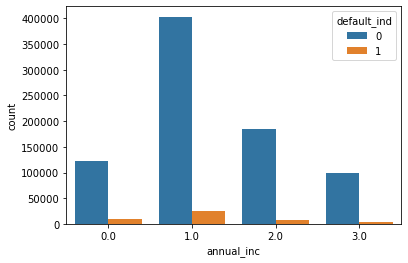

In [48]:
sns.countplot(x='annual_inc',hue='default_ind',data=credit_num)
plt.show()

In [49]:
#loan_amnt
credit_num['loan_amnt'].describe()

count    855969.000000
mean      14745.571335
std        8425.340005
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

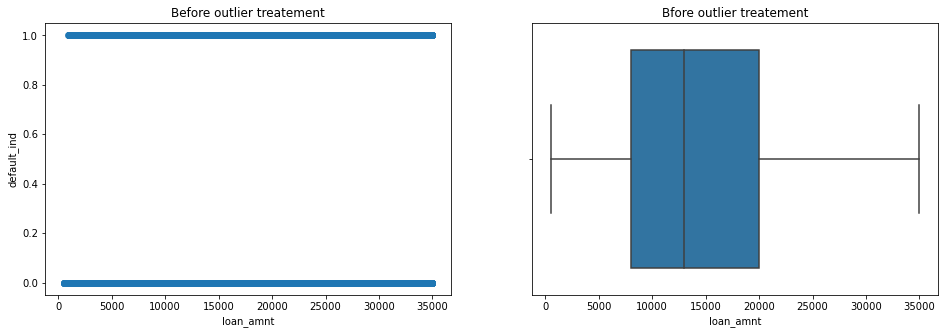

In [50]:
#Checking Outlier loan_amnt
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=credit_num['loan_amnt'], y=credit_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=credit_num,x=credit_num['loan_amnt']).set_title("Bfore outlier treatement")
plt.show()

In [51]:
Q1=credit_num['loan_amnt'].quantile(0.25)
Q3=credit_num['loan_amnt'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)



8000.0
20000.0
12000.0
-10000.0 38000.0


C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


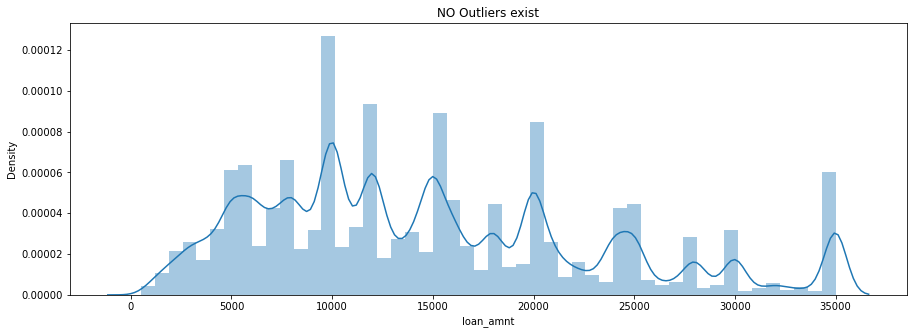

In [52]:
plt.subplots(figsize=(15, 5))
plt.plot
g = sns.distplot(credit_num['loan_amnt']).set_title("NO Outliers exist")



In [53]:
credit_num['loan_amnt_band'] = pd.cut(credit_num['loan_amnt'], 4)
credit_num['loan_amnt_band'].value_counts()

(9125.0, 17750.0]     326382
(465.5, 9125.0]       246730
(17750.0, 26375.0]    189822
(26375.0, 35000.0]     93035
Name: loan_amnt_band, dtype: int64

In [54]:
credit_num.loc[credit_num['loan_amnt'] <= 9125.0, 'loan_amnt'] = 0
credit_num.loc[(credit_num['loan_amnt'] > 9125.0) & (credit_num['loan_amnt'] <= 17750.0), 'loan_amnt'] = 1
credit_num.loc[(credit_num['loan_amnt'] > 17750.0) & (credit_num['loan_amnt'] <= 26375.0), 'loan_amnt'] = 2
credit_num.loc[credit_num['loan_amnt'] > 26375.0, 'loan_amnt'] = 3
credit_num['loan_amnt'].value_counts()



1    326382
0    246730
2    189822
3     93035
Name: loan_amnt, dtype: int64

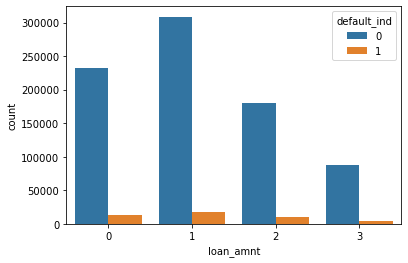

In [55]:
sns.countplot(x='loan_amnt',hue='default_ind',data=credit_num)
plt.show()

In [56]:
#int_rate
credit_num['int_rate'].describe()


count    855969.000000
mean         13.192320
std           4.368365
min           5.320000
25%           9.990000
50%          12.990000
75%          15.990000
max          28.990000
Name: int_rate, dtype: float64

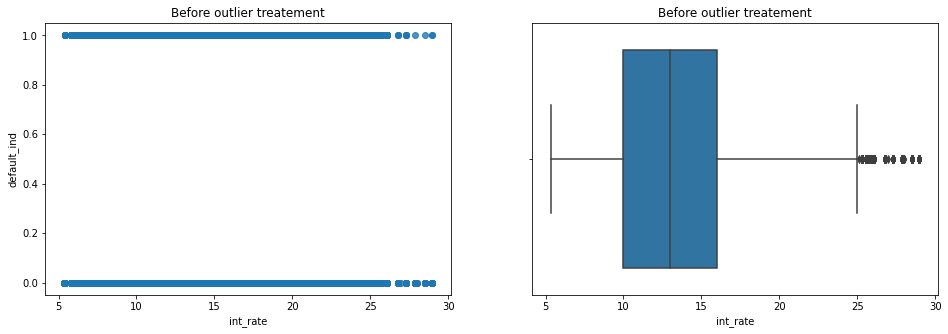

In [57]:
#Checking Outlier int_rate
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=credit_num['int_rate'], y=credit_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=credit_num,x=credit_num['int_rate']).set_title("Before outlier treatement")
plt.show()

In [58]:
Q1=credit_num['int_rate'].quantile(0.25)
Q3=credit_num['int_rate'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

9.99
15.99
6.0
0.9900000000000002 24.990000000000002


C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


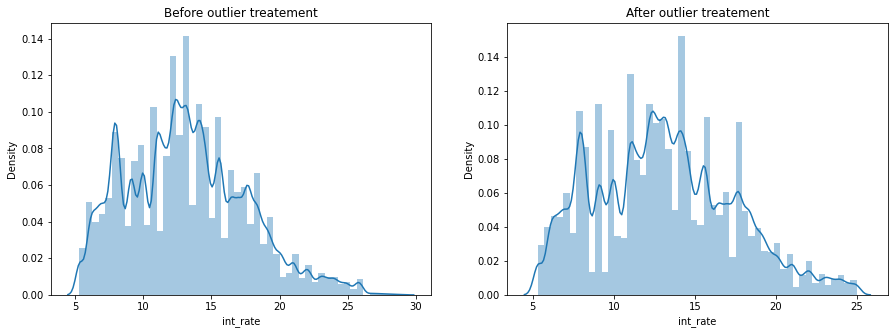

In [59]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(credit_num['int_rate']).set_title("Before outlier treatement")
credit_num = credit_num[credit_num['int_rate']< Upper_Whisker]
credit = credit[credit['int_rate']< Upper_Whisker]
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(credit_num['int_rate']).set_title("After outlier treatement")

In [60]:
credit_num['int_rate_band'] = pd.cut(credit_num['int_rate'], 4)
credit_num['int_rate_band'].value_counts()

(10.238, 15.155]    351088
(5.3, 10.238]       240928
(15.155, 20.072]    208893
(20.072, 24.99]      49142
Name: int_rate_band, dtype: int64

In [61]:
credit_num.loc[credit_num['int_rate'] <= 10.238, 'int_rate'] = 0
credit_num.loc[(credit_num['int_rate'] > 10.238) & (credit_num['int_rate'] <= 15.155), 'int_rate'] = 1
credit_num.loc[(credit_num['int_rate'] > 15.155) & (credit_num['int_rate'] <= 20.072), 'int_rate'] = 2
credit_num.loc[credit_num['int_rate'] > 20.072, 'int_rate'] = 3
credit_num['int_rate'].value_counts()

1.0    351088
0.0    240928
2.0    208893
3.0     49142
Name: int_rate, dtype: int64

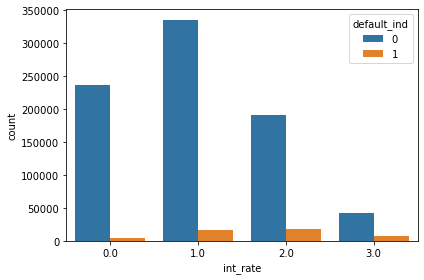

In [62]:
sns.countplot(x='int_rate',hue='default_ind',data=credit_num)
plt.tight_layout()


In [63]:
#dti
credit_num['dti'].describe()

count    850051.000000
mean         18.111031
std          17.469635
min           0.000000
25%          11.870000
50%          17.600000
75%          23.880000
max        9999.000000
Name: dti, dtype: float64

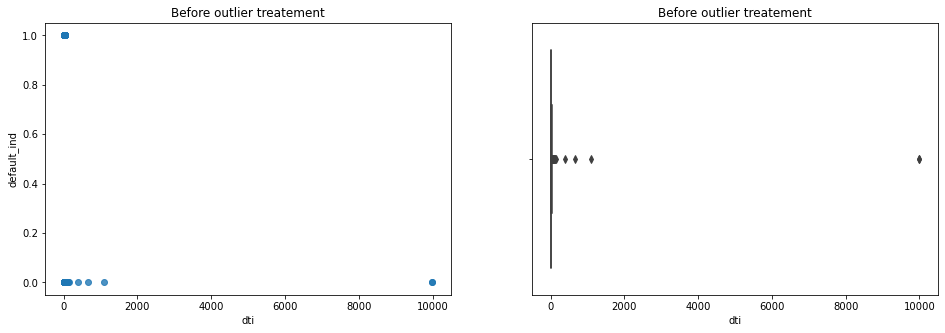

In [64]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=credit_num['dti'], y=credit_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=credit_num,x=credit_num['dti']).set_title("Before outlier treatement")
plt.show()



In [65]:
# Outliers Treatment
#Find mean of the column "dti"
dti_mean = int(credit_num['dti'].mean())
IQR_dti_P75 = credit_num['dti'].quantile(q=0.75)
IQR_dti_P25 = credit_num['dti'].quantile(q=0.25)
IQR_dti = IQR_dti_P75-IQR_dti_P25
IQR_LL = int(IQR_dti_P25 - 1.5*IQR_dti)
IQR_UL = int(IQR_dti_P75 + 1.5*IQR_dti)



C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


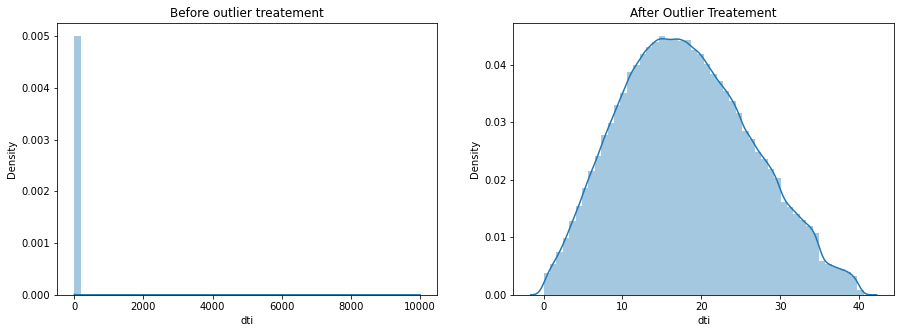

In [66]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(credit_num['dti']).set_title("Before outlier treatement")
credit_num.loc[credit_num['dti']>IQR_UL , 'dti'] = dti_mean
credit.loc[credit['dti']>IQR_UL , 'dti'] = dti_mean
credit_num.loc[credit_num['dti']<IQR_LL , 'dti'] = dti_mean
credit.loc[credit['dti']<IQR_LL , 'dti'] = dti_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(credit_num['dti']).set_title('After Outlier Treatement')



In [67]:
credit_num.columns


Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'default_ind',
       'annual_inc_band', 'loan_amnt_band', 'int_rate_band'],
      dtype='object')

In [68]:
credit_num.drop(['annual_inc_band','loan_amnt_band','int_rate_band'],axis=1,inplace=True)

In [69]:
print(credit.shape, credit_num.shape)

(850051, 41) (850051, 21)


#### EDA of Categorical Data

In [70]:
credit_cat.columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [71]:
#grade
credit_cat['grade'].value_counts()


B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [72]:
#earliest_cr_line
credit_cat['earliest_cr_line'].describe() #Categorical data



count     855969
unique       697
top       Aug-01
freq        6433
Name: earliest_cr_line, dtype: object

In [73]:
#last_pymnt_d
credit_cat['last_pymnt_d'].describe()  # has to dummyfied a lot of categiries



count     847107
unique        97
top       Jan-16
freq      467510
Name: last_pymnt_d, dtype: object

In [74]:
#last_credit_pull_d 
credit_cat['last_credit_pull_d'].describe() # categorical data- has to be dummyfied

count     855969
unique       102
top       Jan-16
freq      701726
Name: last_credit_pull_d, dtype: object

In [75]:
import time 
import datetime 

In [76]:
credit.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
pymnt_plan                       0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
mths_since_last_delinq           0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv     

In [77]:
# Missing value treatment for 'last_pymnt_d'

#last_pymnt_d
credit["last_pymnt_d"].value_counts()

Jan-16    464381
Dec-15    141843
Jul-15     14299
Aug-15     12869
Oct-15     12407
Jun-15     11848
Sep-15     11357
Apr-15     10987
May-15     10954
Mar-15     10642
Nov-15     10629
Feb-15      8766
Jan-15      8576
Oct-14      7600
Dec-14      7179
Jul-14      6271
Aug-14      6250
Sep-14      6249
Nov-14      6124
Jun-14      5580
May-14      4690
Mar-14      4542
Apr-14      4288
Jan-14      3620
Feb-14      3608
Dec-13      3014
Oct-13      2796
Nov-13      2621
Aug-13      2496
Sep-13      2478
Jul-13      2369
May-13      2134
Mar-13      2026
Jun-13      1972
Apr-13      1871
Feb-13      1577
Jan-13      1437
Oct-12      1241
Dec-12      1173
Nov-12      1156
Aug-12      1098
Sep-12      1084
Jul-12       929
Mar-12       902
May-12       841
Jun-12       826
Apr-12       813
Feb-12       757
Jan-12       546
Dec-11       544
Mar-11       488
Nov-11       454
Oct-11       453
Sep-11       450
Aug-11       428
Apr-11       420
Jul-11       394
May-11       386
Jun-11       3

In [78]:
credit["last_pymnt_d"].describe()

count     841256
unique        97
top       Jan-16
freq      464381
Name: last_pymnt_d, dtype: object

In [79]:
# droping col 'last_pymnt_d'
credit.drop(["last_pymnt_d"],axis=1,inplace=True)

In [80]:
#To reset all the indexes 
credit.reset_index(drop=True, inplace=True)
credit_cat.reset_index(drop=True, inplace=True)
credit_num.reset_index(drop=True, inplace=True)

In [81]:
credit.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [82]:
credit_cat.columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [83]:
credit_ordinal=credit_cat.loc[:,['term','purpose','application_type','addr_state', 
                              'last_credit_pull_d']] 

In [84]:
credit_ordinal.columns

Index(['term', 'purpose', 'application_type', 'addr_state',
       'last_credit_pull_d'],
      dtype='object')

In [85]:
print(credit.shape,credit_num.shape,credit_cat.shape,credit_ordinal.shape)

(850051, 40) (850051, 21) (855969, 13) (855969, 5)


In [86]:
credit_numerical= credit_cat.loc[:,['grade','home_ownership','verification_status','initial_list_status',
                                    ]]

In [87]:
credit_numerical.shape

(855969, 4)

In [88]:
credit_num_all = pd.concat([credit_num,credit_numerical], axis = 1)

In [89]:
credit_num_all.shape

(855969, 25)

In [90]:
credit_num_all.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'default_ind', 'grade',
       'home_ownership', 'verification_status', 'initial_list_status'],
      dtype='object')

In [91]:
credit_num_all.drop(['default_ind'],axis=1,inplace=True)

In [92]:
credit_num_all.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'grade',
       'home_ownership', 'verification_status', 'initial_list_status'],
      dtype='object')

#### Label Encoding of Categorical Data

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
LabelEncoder_categorical = credit_cat.loc[:,['term','purpose','addr_state', 
                             'last_credit_pull_d']]
dummyEncoder_categorical = credit_cat.loc[:,['term','purpose','addr_state', 
                             'last_credit_pull_d']]

In [95]:
LabelEncoder_categorical.isnull().sum()

term                  0
purpose               0
addr_state            0
last_credit_pull_d    0
dtype: int64

In [96]:
categorical_feature_mask = LabelEncoder_categorical.dtypes==object
categorical_feature_mask

term                  True
purpose               True
addr_state            True
last_credit_pull_d    True
dtype: bool

In [97]:
categorical_cols = LabelEncoder_categorical.columns[categorical_feature_mask].tolist()

In [98]:
categorical_cols

['term', 'purpose', 'addr_state', 'last_credit_pull_d']

In [99]:
le = LabelEncoder()
LabelEncoder_categorical[categorical_cols] = LabelEncoder_categorical[categorical_cols].apply(lambda col: le.fit_transform(col))
LabelEncoder_categorical.head()

,term,purpose,addr_state,last_credit_pull_d
0,0,1,3,41
1,1,0,10,99
2,0,11,14,41
3,0,9,4,40
4,1,9,37,41


In [100]:
LabelEncoder_categorical.shape

(855969, 4)

In [101]:
dummyEncoder_categorical = pd.get_dummies(dummyEncoder_categorical, drop_first=True)
dummyEncoder_categorical.shape

(855969, 165)

In [102]:
dummyEncoder_categorical.head()

,term_ 60 months,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,last_credit_pull_d_Apr-10,last_credit_pull_d_Apr-11,last_credit_pull_d_Apr-12,last_credit_pull_d_Apr-13,last_credit_pull_d_Apr-14,last_credit_pull_d_Apr-15,last_credit_pull_d_Aug-07,last_credit_pull_d_Aug-08,last_credit_pull_d_Aug-09,last_credit_pull_d_Aug-10,last_credit_pull_d_Aug-11,last_credit_pull_d_Aug-12,last_credit_pull_d_Aug-13,last_credit_pull_d_Aug-14,last_credit_pull_d_Aug-15,last_credit_pull_d_Dec-07,last_credit_pull_d_Dec-08,last_credit_pull_d_Dec-09,last_credit_pull_d_Dec-10,last_credit_pull_d_Dec-11,last_credit_pull_d_Dec-12,last_credit_pull_d_Dec-13,last_credit_pull_d_Dec-14,last_credit_pull_d_Dec-15,last_credit_pull_d_Feb-08,last_credit_pull_d_Feb-09,last_credit_pull_d_Feb-10,last_credit_pull_d_Feb-11,last_credit_pull_d_Feb-12,last_credit_pull_d_Feb-13,last_credit_pull_d_Feb-14,last_credit_pull_d_Feb-15,last_credit_pull_d_Jan-08,last_credit_pull_d_Jan-09,last_credit_pull_d_Jan-10,last_credit_pull_d_Jan-11,last_credit_pull_d_Jan-12,last_credit_pull_d_Jan-13,last_credit_pull_d_Jan-14,last_credit_pull_d_Jan-15,last_credit_pull_d_Jan-16,last_credit_pull_d_Jul-07,last_credit_pull_d_Jul-08,last_credit_pull_d_Jul-09,last_credit_pull_d_Jul-10,last_credit_pull_d_Jul-11,last_credit_pull_d_Jul-12,last_credit_pull_d_Jul-13,last_credit_pull_d_Jul-14,last_credit_pull_d_Jul-15,last_credit_pull_d_Jun-07,last_credit_pull_d_Jun-08,last_credit_pull_d_Jun-09,last_credit_pull_d_Jun-10,last_credit_pull_d_Jun-11,last_credit_pull_d_Jun-12,last_credit_pull_d_Jun-13,last_credit_pull_d_Jun-14,last_credit_pull_d_Jun-15,last_credit_pull_d_Mar-08,last_credit_pull_d_Mar-09,last_credit_pull_d_Mar-10,last_credit_pull_d_Mar-11,last_credit_pull_d_Mar-12,last_credit_pull_d_Mar-13,last_credit_pull_d_Mar-14,last_credit_pull_d_Mar-15,last_credit_pull_d_May-07,last_credit_pull_d_May-08,last_credit_pull_d_May-09,last_credit_pull_d_May-10,last_credit_pull_d_May-11,last_credit_pull_d_May-12,last_credit_pull_d_May-13,last_credit_pull_d_May-14,last_credit_pull_d_May-15,last_credit_pull_d_Nov-09,last_credit_pull_d_Nov-10,last_credit_pull_d_Nov-11,last_credit_pull_d_Nov-12,last_credit_pull_d_Nov-13,last_credit_pull_d_Nov-14,last_credit_pull_d_Nov-15,last_credit_pull_d_Oct-07,last_credit_pull_d_Oct-08,last_credit_pull_d_Oct-09,last_credit_pull_d_Oct-10,last_credit_pull_d_Oct-11,last_credit_pull_d_Oct-12,last_credit_pull_d_Oct-13,last_credit_pull_d_Oct-14,last_credit_pull_d_Oct-15,last_credit_pull_d_Sep-07,last_credit_pull_d_Sep-08,last_credit_pull_d_Sep-09,last_credit_pull_d_Sep-10,last_credit_pull_d_Sep-11,last_credit_pull_d_Sep-12,last_credit_pull_d_Sep-13,last_credit_pull_d_Sep-14,last_credit_pull_d_Sep-15
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [103]:
credit_num.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'default_ind'],
      dtype='object')

In [104]:
credit_numerical.columns

Index(['grade', 'home_ownership', 'verification_status',
       'initial_list_status'],
      dtype='object')

In [105]:
scaled_all_numeric=credit.loc[:,['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']]

In [106]:
scaled_all_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850051 entries, 0 to 850050
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   850051 non-null  int64  
 1   int_rate                    850051 non-null  float64
 2   annual_inc                  850051 non-null  float64
 3   dti                         850051 non-null  float64
 4   delinq_2yrs                 850051 non-null  int64  
 5   inq_last_6mths              850051 non-null  int64  
 6   mths_since_last_delinq      850051 non-null  float64
 7   open_acc                    850051 non-null  int64  
 8   pub_rec                     850051 non-null  int64  
 9   revol_bal                   850051 non-null  int64  
 10  revol_util                  850051 non-null  float64
 11  total_acc                   850051 non-null  int64  
 12  out_prncp                   850051 non-null  float64
 13  total_pymnt   

#### Scaler Tranformation of all the numerical data

In [107]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = preprocessing.StandardScaler().fit(scaled_all_numeric)
scaled_numeric_all = scaler.transform(scaled_all_numeric)
Numeric_Scaled = pd.DataFrame(scaled_numeric_all, columns=scaled_all_numeric.columns.tolist())

In [109]:
Numeric_Scaled.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,-1.154094,-0.577364,-0.793871,1.154934,-0.363387,0.337470,-0.100269,-1.609475,-0.334075,-0.147002,1.206917,-1.377194,-0.978560,-0.224927,-0.426398,-0.422501,-0.106277,-0.063605,-0.000014,-0.000448
1,-1.451311,0.510316,-0.700596,-2.061943,-0.363387,4.505879,-0.100269,-1.609475,-0.334075,-0.684873,-1.915396,-1.800477,-0.978560,-0.839781,-0.633361,-0.433245,-0.106277,-0.063605,-0.000014,-0.000448
2,-1.463200,0.672761,-0.976504,-1.130075,-0.363387,1.379572,-0.100269,-1.797970,-0.334075,-0.627808,1.828858,-1.292537,-0.978560,-0.586997,-0.551489,-0.323604,-0.106277,-0.063605,-0.000014,-0.000448
3,-0.559659,0.091253,-0.402116,0.231515,-0.363387,0.337470,0.160756,-0.290014,-0.334075,-0.509000,-1.427928,0.993192,-0.978560,0.581626,0.228777,-0.384071,-0.106277,-0.063605,-0.000014,-0.000448
4,-1.391868,-0.097090,0.076696,-0.017144,-0.363387,-0.704632,0.356525,0.652458,-0.334075,0.488632,-0.045370,1.077848,-0.887692,-0.556774,-0.354479,-0.443971,-0.106277,-0.063605,-0.000014,-0.000448


In [110]:
data=pd.concat([Numeric_Scaled,dummyEncoder_categorical],axis=1)

In [111]:
data.shape

(855969, 185)

In [112]:
data.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_ 60 months,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,last_credit_pull_d_Apr-10,last_credit_pull_d_Apr-11,last_credit_pull_d_Apr-12,last_credit_pull_d_Apr-13,last_credit_pull_d_Apr-14,last_credit_pull_d_Apr-15,last_credit_pull_d_Aug-07,last_credit_pull_d_Aug-08,last_credit_pull_d_Aug-09,last_credit_pull_d_Aug-10,last_credit_pull_d_Aug-11,last_credit_pull_d_Aug-12,last_credit_pull_d_Aug-13,last_credit_pull_d_Aug-14,last_credit_pull_d_Aug-15,last_credit_pull_d_Dec-07,last_credit_pull_d_Dec-08,last_credit_pull_d_Dec-09,last_credit_pull_d_Dec-10,last_credit_pull_d_Dec-11,last_credit_pull_d_Dec-12,last_credit_pull_d_Dec-13,last_credit_pull_d_Dec-14,last_credit_pull_d_Dec-15,last_credit_pull_d_Feb-08,last_credit_pull_d_Feb-09,last_credit_pull_d_Feb-10,last_credit_pull_d_Feb-11,last_credit_pull_d_Feb-12,last_credit_pull_d_Feb-13,last_credit_pull_d_Feb-14,last_credit_pull_d_Feb-15,last_credit_pull_d_Jan-08,last_credit_pull_d_Jan-09,last_credit_pull_d_Jan-10,last_credit_pull_d_Jan-11,last_credit_pull_d_Jan-12,last_credit_pull_d_Jan-13,last_credit_pull_d_Jan-14,last_credit_pull_d_Jan-15,last_credit_pull_d_Jan-16,last_credit_pull_d_Jul-07,last_credit_pull_d_Jul-08,last_credit_pull_d_Jul-09,last_credit_pull_d_Jul-10,last_credit_pull_d_Jul-11,last_credit_pull_d_Jul-12,last_credit_pull_d_Jul-13,last_credit_pull_d_Jul-14,last_credit_pull_d_Jul-15,last_credit_pull_d_Jun-07,last_credit_pull_d_Jun-08,last_credit_pull_d_Jun-09,last_credit_pull_d_Jun-10,last_credit_pull_d_Jun-11,last_credit_pull_d_Jun-12,last_credit_pull_d_Jun-13,last_credit_pull_d_Jun-14,last_credit_pull_d_Jun-15,last_credit_pull_d_Mar-08,last_credit_pull_d_Mar-09,last_credit_pull_d_Mar-10,last_credit_pull_d_Mar-11,last_credit_pull_d_Mar-12,last_credit_pull_d_Mar-13,last_credit_pull_d_Mar-14,last_credit_pull_d_Mar-15,last_credit_pull_d_May-07,last_credit_pull_d_May-08,last_credit_pull_d_May-09,last_credit_pull_d_May-10,last_credit_pull_d_May-11,last_credit_pull_d_May-12,last_credit_pull_d_May-13,last_credit_pull_d_May-14,last_credit_pull_d_May-15,last_credit_pull_d_Nov-09,last_credit_pull_d_Nov-10,last_credit_pull_d_Nov-11,last_credit_pull_d_Nov-12,last_credit_pull_d_Nov-13,last_credit_pull_d_Nov-14,last_credit_pull_d_Nov-15,last_credit_pull_d_Oct-07,last_credit_pull_d_Oct-08,last_credit_pull_d_Oct-09,last_credit_pull_d_Oct-10,last_credit_pull_d_Oct-11,last_credit_pull_d_Oct-12,last_credit_pull_d_Oct-13,last_credit_pull_d_Oct-14,last_credit_pull_d_Oct-15,last_credit_pull_d_Sep-07,last_credit_pull_d_Sep-08,last_credit_pull_d_Sep-09,last_credit_pull_d_Sep-10,last_credit_pull_d_Sep-11,last_credit_pull_d_Sep-12,last_credit_pull_d_Sep-13,last_credit_pull_d_Sep-14,last_credit_pull_d_Sep-15
0,-1.154094,-0.577364,-0.793871,1.154934,-0.363387,0.337470,-0.100269,-1.609475,-0.334075,-0.147002,1.206917,-1.377194,-0.978560,-0.224927,-0.426398,-0

In [113]:
print(Numeric_Scaled.shape, dummyEncoder_categorical.shape, data.shape)

(850051, 20) (855969, 165) (855969, 185)


### Splittling the Dataset

In [114]:
data[['issue_d']]= credit_cat[['issue_d']]

In [115]:
data[['default_ind']]=credit[['default_ind']]

In [116]:
data.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_ 60 months,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,last_credit_pull_d_Apr-10,last_credit_pull_d_Apr-11,last_credit_pull_d_Apr-12,last_credit_pull_d_Apr-13,last_credit_pull_d_Apr-14,last_credit_pull_d_Apr-15,last_credit_pull_d_Aug-07,last_credit_pull_d_Aug-08,last_credit_pull_d_Aug-09,last_credit_pull_d_Aug-10,last_credit_pull_d_Aug-11,last_credit_pull_d_Aug-12,last_credit_pull_d_Aug-13,last_credit_pull_d_Aug-14,last_credit_pull_d_Aug-15,last_credit_pull_d_Dec-07,last_credit_pull_d_Dec-08,last_credit_pull_d_Dec-09,last_credit_pull_d_Dec-10,last_credit_pull_d_Dec-11,last_credit_pull_d_Dec-12,last_credit_pull_d_Dec-13,last_credit_pull_d_Dec-14,last_credit_pull_d_Dec-15,last_credit_pull_d_Feb-08,last_credit_pull_d_Feb-09,last_credit_pull_d_Feb-10,last_credit_pull_d_Feb-11,last_credit_pull_d_Feb-12,last_credit_pull_d_Feb-13,last_credit_pull_d_Feb-14,last_credit_pull_d_Feb-15,last_credit_pull_d_Jan-08,last_credit_pull_d_Jan-09,last_credit_pull_d_Jan-10,last_credit_pull_d_Jan-11,last_credit_pull_d_Jan-12,last_credit_pull_d_Jan-13,last_credit_pull_d_Jan-14,last_credit_pull_d_Jan-15,last_credit_pull_d_Jan-16,last_credit_pull_d_Jul-07,last_credit_pull_d_Jul-08,last_credit_pull_d_Jul-09,last_credit_pull_d_Jul-10,last_credit_pull_d_Jul-11,last_credit_pull_d_Jul-12,last_credit_pull_d_Jul-13,last_credit_pull_d_Jul-14,last_credit_pull_d_Jul-15,last_credit_pull_d_Jun-07,last_credit_pull_d_Jun-08,last_credit_pull_d_Jun-09,last_credit_pull_d_Jun-10,last_credit_pull_d_Jun-11,last_credit_pull_d_Jun-12,last_credit_pull_d_Jun-13,last_credit_pull_d_Jun-14,last_credit_pull_d_Jun-15,last_credit_pull_d_Mar-08,last_credit_pull_d_Mar-09,last_credit_pull_d_Mar-10,last_credit_pull_d_Mar-11,last_credit_pull_d_Mar-12,last_credit_pull_d_Mar-13,last_credit_pull_d_Mar-14,last_credit_pull_d_Mar-15,last_credit_pull_d_May-07,last_credit_pull_d_May-08,last_credit_pull_d_May-09,last_credit_pull_d_May-10,last_credit_pull_d_May-11,last_credit_pull_d_May-12,last_credit_pull_d_May-13,last_credit_pull_d_May-14,last_credit_pull_d_May-15,last_credit_pull_d_Nov-09,last_credit_pull_d_Nov-10,last_credit_pull_d_Nov-11,last_credit_pull_d_Nov-12,last_credit_pull_d_Nov-13,last_credit_pull_d_Nov-14,last_credit_pull_d_Nov-15,last_credit_pull_d_Oct-07,last_credit_pull_d_Oct-08,last_credit_pull_d_Oct-09,last_credit_pull_d_Oct-10,last_credit_pull_d_Oct-11,last_credit_pull_d_Oct-12,last_credit_pull_d_Oct-13,last_credit_pull_d_Oct-14,last_credit_pull_d_Oct-15,last_credit_pull_d_Sep-07,last_credit_pull_d_Sep-08,last_credit_pull_d_Sep-09,last_credit_pull_d_Sep-10,last_credit_pull_d_Sep-11,last_credit_pull_d_Sep-12,last_credit_pull_d_Sep-13,last_credit_pull_d_Sep-14,last_credit_pull_d_Sep-15,issue_d,default_ind
0,-1.154094,-0.577364,-0.793871,1.154934,-0.363387,0.337470,-0.100269,-1.609475,-0.334075,-0.147002,1.206917,-1.377194,-0.978560,-0

#### for splitting purpose'

#### We will convert the 'issue_d' column into date time format

In [117]:
data['issue_d'] = pd.to_datetime(data['issue_d'].str.upper(),format='%b-%y',yearfirst=False)

# Creating train and test data set According to problem statement given The data should be divided into train 
# set June 2007 - May 2015 )'and test set( June 2015 - Dec 2015 ) data.


In [118]:
train1 = data[data['issue_d'] < '2015-6-01']
test1 = data[data['issue_d'] >= '2015-6-01']
print(train1.shape, test1.shape)

(598978, 187) (256991, 187)


In [119]:
train1.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_ 60 months,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,last_credit_pull_d_Apr-10,last_credit_pull_d_Apr-11,last_credit_pull_d_Apr-12,last_credit_pull_d_Apr-13,last_credit_pull_d_Apr-14,last_credit_pull_d_Apr-15,last_credit_pull_d_Aug-07,last_credit_pull_d_Aug-08,last_credit_pull_d_Aug-09,last_credit_pull_d_Aug-10,last_credit_pull_d_Aug-11,last_credit_pull_d_Aug-12,last_credit_pull_d_Aug-13,last_credit_pull_d_Aug-14,last_credit_pull_d_Aug-15,last_credit_pull_d_Dec-07,last_credit_pull_d_Dec-08,last_credit_pull_d_Dec-09,last_credit_pull_d_Dec-10,last_credit_pull_d_Dec-11,last_credit_pull_d_Dec-12,last_credit_pull_d_Dec-13,last_credit_pull_d_Dec-14,last_credit_pull_d_Dec-15,last_credit_pull_d_Feb-08,last_credit_pull_d_Feb-09,last_credit_pull_d_Feb-10,last_credit_pull_d_Feb-11,last_credit_pull_d_Feb-12,last_credit_pull_d_Feb-13,last_credit_pull_d_Feb-14,last_credit_pull_d_Feb-15,last_credit_pull_d_Jan-08,last_credit_pull_d_Jan-09,last_credit_pull_d_Jan-10,last_credit_pull_d_Jan-11,last_credit_pull_d_Jan-12,last_credit_pull_d_Jan-13,last_credit_pull_d_Jan-14,last_credit_pull_d_Jan-15,last_credit_pull_d_Jan-16,last_credit_pull_d_Jul-07,last_credit_pull_d_Jul-08,last_credit_pull_d_Jul-09,last_credit_pull_d_Jul-10,last_credit_pull_d_Jul-11,last_credit_pull_d_Jul-12,last_credit_pull_d_Jul-13,last_credit_pull_d_Jul-14,last_credit_pull_d_Jul-15,last_credit_pull_d_Jun-07,last_credit_pull_d_Jun-08,last_credit_pull_d_Jun-09,last_credit_pull_d_Jun-10,last_credit_pull_d_Jun-11,last_credit_pull_d_Jun-12,last_credit_pull_d_Jun-13,last_credit_pull_d_Jun-14,last_credit_pull_d_Jun-15,last_credit_pull_d_Mar-08,last_credit_pull_d_Mar-09,last_credit_pull_d_Mar-10,last_credit_pull_d_Mar-11,last_credit_pull_d_Mar-12,last_credit_pull_d_Mar-13,last_credit_pull_d_Mar-14,last_credit_pull_d_Mar-15,last_credit_pull_d_May-07,last_credit_pull_d_May-08,last_credit_pull_d_May-09,last_credit_pull_d_May-10,last_credit_pull_d_May-11,last_credit_pull_d_May-12,last_credit_pull_d_May-13,last_credit_pull_d_May-14,last_credit_pull_d_May-15,last_credit_pull_d_Nov-09,last_credit_pull_d_Nov-10,last_credit_pull_d_Nov-11,last_credit_pull_d_Nov-12,last_credit_pull_d_Nov-13,last_credit_pull_d_Nov-14,last_credit_pull_d_Nov-15,last_credit_pull_d_Oct-07,last_credit_pull_d_Oct-08,last_credit_pull_d_Oct-09,last_credit_pull_d_Oct-10,last_credit_pull_d_Oct-11,last_credit_pull_d_Oct-12,last_credit_pull_d_Oct-13,last_credit_pull_d_Oct-14,last_credit_pull_d_Oct-15,last_credit_pull_d_Sep-07,last_credit_pull_d_Sep-08,last_credit_pull_d_Sep-09,last_credit_pull_d_Sep-10,last_credit_pull_d_Sep-11,last_credit_pull_d_Sep-12,last_credit_pull_d_Sep-13,last_credit_pull_d_Sep-14,last_credit_pull_d_Sep-15,issue_d,default_ind
0,-1.154094,-0.577364,-0.793871,1.154934,-0.363387,0.337470,-0.100269,-1.609475,-0.334075,-0.147002,1.206917,-1.377194,-0.978560,-0

In [120]:
train1 =train1.drop('issue_d' , axis=1)
test1 =test1.drop('issue_d', axis=1)
"""X = train1.iloc[:,0:-1]
y = train1['default_ind']"""

X_train1 = train1.iloc[:,0:-1]
y_train1 = train1['default_ind']
X_test_com1  = test1.iloc[:,0:-1]
y_test_com1  = test1['default_ind']

In [121]:
print(X_train1.shape, y_train1.shape, X_test_com1.shape, y_test_com1.shape)

(598978, 185) (598978,) (256991, 185) (256991,)


### Splitting the train dataset further so as to reduce the computing time

In [122]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_train1, y_train1, test_size = 0.3, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(419284, 185) (419284,) (179694, 185) (179694,)


#### We will drop the null values in Both train and test data sets as it will create an error while creating the Model

#### So we will create new data set name X_train_new,y_train_new,X_test_new,y_test_new

In [123]:
y_train.isnull().sum()

4208

In [124]:
y_train_new = y_train.dropna()

In [125]:
y_train_new.isnull().sum()

0

In [126]:
X_train.isnull().sum()

loan_amnt                     4208
int_rate                      4208
annual_inc                    4208
dti                           4208
delinq_2yrs                   4208
inq_last_6mths                4208
mths_since_last_delinq        4208
open_acc                      4208
pub_rec                       4208
revol_bal                     4208
revol_util                    4208
total_acc                     4208
out_prncp                     4208
total_pymnt                   4208
total_rec_int                 4208
last_pymnt_amnt               4208
collections_12_mths_ex_med    4208
acc_now_delinq                4208
tot_coll_amt                  4208
tot_cur_bal                   4208
term_ 60 months                  0
purpose_credit_card              0
purpose_debt_consolidation       0
purpose_educational              0
purpose_home_improvement         0
purpose_house                    0
purpose_major_purchase           0
purpose_medical                  0
purpose_moving      

In [127]:
X_train_new=X_train.dropna()

In [128]:
X_train_new.isnull().sum()

loan_amnt                     0
int_rate                      0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt                   0
total_rec_int                 0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
term_ 60 months               0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_house                 0
purpose_major_purchase        0
purpose_medical               0
purpose_moving                0
purpose_other                 0
purpose_renewable_energy      0
purpose_

In [129]:
X_test.isnull().sum()

loan_amnt                     1710
int_rate                      1710
annual_inc                    1710
dti                           1710
delinq_2yrs                   1710
inq_last_6mths                1710
mths_since_last_delinq        1710
open_acc                      1710
pub_rec                       1710
revol_bal                     1710
revol_util                    1710
total_acc                     1710
out_prncp                     1710
total_pymnt                   1710
total_rec_int                 1710
last_pymnt_amnt               1710
collections_12_mths_ex_med    1710
acc_now_delinq                1710
tot_coll_amt                  1710
tot_cur_bal                   1710
term_ 60 months                  0
purpose_credit_card              0
purpose_debt_consolidation       0
purpose_educational              0
purpose_home_improvement         0
purpose_house                    0
purpose_major_purchase           0
purpose_medical                  0
purpose_moving      

In [130]:
X_test_new=X_test.dropna()

In [131]:
y_test_new=y_test.dropna()

In [132]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\aditya\anaconda3\lib\site-packages (0.24.0)
Note: you may need to restart the kernel to use updated packages.


#### Importing LOGISTIC REGRESSION model

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score, roc_auc_score

In [134]:
LR = LogisticRegression(max_iter=200, C=0.5)

#### Fitting Logistic Regression model on training dataset

In [135]:
LR.fit(X_train_new, y_train_new)

C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, max_iter=200)

#### Checking Scores of the test part of the training dataset

#### Also checking scores for the test dataset

In [136]:
acc_v=LR.score(X_test_new, y_test_new)
acc = LR.score(X_test_com1, y_test_com1)

In [137]:
print(acc_v,acc)

0.9912183117583603 0.9996225548754626


#### Checking prediction for test part of the training dataset and test datasets

In [138]:
predv= LR.predict(X_test_new)
preds = LR.predict(X_test_com1)

In [139]:
print(predv,preds)

[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]


In [140]:
pred_probav = LR.predict_proba(X_test_new)[::,1]
pred_proba = LR.predict_proba(X_test_com1)[::,1]

In [141]:
pred_probav

array([8.53913957e-03, 1.32857436e-03, 1.78363530e-15, ...,
       5.39269624e-02, 8.83468024e-17, 1.83936523e-05])

In [142]:
print("Accuracy on validation set: %.2f%%" % (acc_v * 100.0))
print("Accuracy on test set: %.2f%%" % (acc * 100.0))

Accuracy on validation set: 99.12%
Accuracy on test set: 99.96%


#### Classification report on Train data set

In [143]:
print('F1 score val:\n', classification_report(y_test_new, predv)) 

F1 score val:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    164209
         1.0       0.98      0.90      0.94     13775

    accuracy                           0.99    177984
   macro avg       0.99      0.95      0.97    177984
weighted avg       0.99      0.99      0.99    177984



#### Classification report on the test data set

In [144]:
print('F1 score test:\n', classification_report(y_test_com1, preds))

F1 score test:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256668
         1.0       0.90      0.78      0.84       323

    accuracy                           1.00    256991
   macro avg       0.95      0.89      0.92    256991
weighted avg       1.00      1.00      1.00    256991



#### Confusion Matrix on the test dataset

In [145]:
conf_matrix = confusion_matrix(y_test_new,predv)
print(conf_matrix)

[[163999    210]
 [  1353  12422]]


#### AUROC curve for Logistic Regression

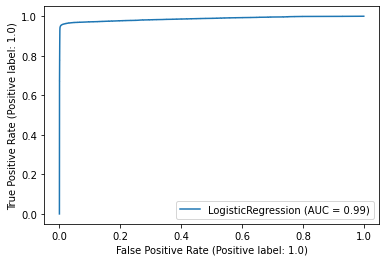

In [146]:
from sklearn import metrics

metrics.plot_roc_curve(LR,X_test_new,y_test_new)
plt.show()

In [147]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\aditya\anaconda3\lib\site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


#### Model preparing using Decision Tree

X_test_new.shape

In [148]:
y_test_new.shape

(177984,)

In [149]:
X_train_new.shape

(415076, 185)

In [150]:
y_train_new.shape

(415076,)

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
DT = DecisionTreeClassifier()

In [153]:
DT.fit(X_train_new,y_train_new)

DecisionTreeClassifier()

In [154]:
predDT= DT.predict(X_test_new)

In [155]:
predDT

array([0., 0., 0., ..., 0., 0., 0.])

#### Confusion Matrix

In [156]:
from sklearn.metrics import confusion_matrix

In [157]:
conf_mat = confusion_matrix(y_test_new,predDT)

In [158]:
print(conf_mat)

[[163484    725]
 [   729  13046]]


#### Classification Report

In [159]:
from sklearn.metrics import classification_report

In [160]:
cl= classification_report(y_test_new,predDT)
print(cl)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    164209
         1.0       0.95      0.95      0.95     13775

    accuracy                           0.99    177984
   macro avg       0.97      0.97      0.97    177984
weighted avg       0.99      0.99      0.99    177984



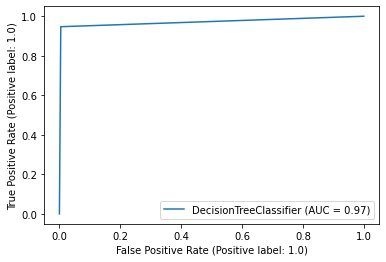

In [161]:
metrics.plot_roc_curve(DT,X_test_new,y_test_new)
plt.show()

#### Model preparing using Random Forest

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
# Create random tree classifer objectc
clf_RF=RandomForestClassifier(random_state=0,n_jobs=-1)

In [164]:
# Train model
model_RF=clf_RF.fit(X_train_new,y_train_new)

In [165]:
# Predicting the model
pred_RF=model_RF.predict(X_test_new)

#### Confusion Matrix

In [166]:
conf_mat1 = confusion_matrix(y_test_new,pred_RF)

In [167]:
print(conf_mat1)

[[164177     32]
 [  2278  11497]]


#### Classification Report

In [168]:
cl1= classification_report(y_test_new,pred_RF)
print(cl1)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    164209
         1.0       1.00      0.83      0.91     13775

    accuracy                           0.99    177984
   macro avg       0.99      0.92      0.95    177984
weighted avg       0.99      0.99      0.99    177984



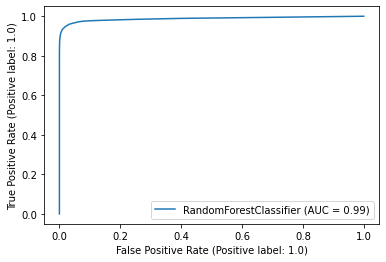

In [169]:
metrics.plot_roc_curve(clf_RF,X_test_new,y_test_new)
plt.show()